# Technical Report: 
## Predicting the Quality of Care of US Health Insurance Providers in Year 2020

## Published By: Darshan Donthi

### Background:

The Health Insurance Marketplace Public Use Files (PUFs) contain data on health and dental plans offered to individuals and small businesses through the US Health Insurance Marketplace. The dataset includes plan and issuer level information for certified Qualified Health Plans (QHPs) and stand-alone dental plans (SADPs).

This data was originally prepared and released by the Centers for Medicare & Medicaid Services (CMS) [1].

*I originally found an older dataset on Kaggle [2], however I used the 2020 dataset available directly on the CMS website instead [1].*

### Objectives:

**1) Conduct Exploratory Data Analysis (EDA) of the dataset:**<br>
-- Look at Benefits Cost Sharing and Rate PUFs <br>
-- Engineer new columns from existing data <br>

**2) Predict the Quality of Care of a Health Insurance Provider (Issuer):**<br>
-- Create K-Nearest Neighbor (KNN) Classifier models <br>
-- Determine optimal model and its viability through Cross Validation <br>

### Table of Contents:

**Section 1:** Read, Clean, and Explore the Data<br>
**Section 2:** Feature Engineering from Existing Data<br>
**Section 3:** Predictive KNN Classifier Models and Analysis<br>
**Section 4:** References

### Data Dictionaries:

Data Dictionary PDFs for 2020 Benefits Cost Sharing and Rate PUFs available in the Data_Dictionaries folder.<br>
These were obtained from the CMS website [1].<br>

Benefits Cost Sharing PUF: Plan variant-level data on essential health benefits, coverage limits, and cost
sharing for each QHP and SADP. <br>
Rate PUF: Plan-level data on individual rates based on an eligible subscriber’s age, tobacco use, and geographic location, and family-tier rates.

## Section 1: Read, Clean, and Explore the Data

In [1]:
#Import all relevant libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Benefits Cost Sharing PUF

In [2]:
#Read in the benefits cost sharing PUF dataset for 2020.

benefitscostsharing = pd.read_csv("D:/Datasets/CMS_healthinsurance_bundle_2020/Benefits_Cost_Sharing_PUF.csv", encoding='cp1252');

#Windows-1252 or CP-1252 (code page 1252) is a single-byte character encoding of the Latin alphabet, 
#used by default in the legacy components of Microsoft Windows for English 
#and many European languages such as Spanish, French, and German.

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,12,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Display a few rows of benefitscostsharing DF and its shape.

display(benefitscostsharing.head())
display(benefitscostsharing.shape)

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
0,2020,AK,21989,HIOS,2019-08-09 03:20:19,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,NaN,...,NaN,Covered,Yes,1000.0,Dollars per Year,NaN,$1000 annual maximum plan payment limit combin...,Not EHB,Yes,Yes
1,2020,AK,21989,HIOS,2019-08-09 03:20:19,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for additional limitations,Substantially Equal,No,No
2,2020,AK,21989,HIOS,2019-08-09 03:20:19,21989AK0030001,21989AK0030001-00,Basic Dental Care - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,NaN,NaN,No,No
3,2020,AK,21989,HIOS,2019-08-09 03:20:19,21989AK0030001,21989AK0030001-00,Orthodontia - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,Only medically necessary orthodontia is covered,Substantially Equal,No,No
4,2020,AK,21989,HIOS,2019-08-09 03:20:19,21989AK0030001,21989AK0030001-00,Major Dental Care - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,NaN,NaN,No,No


(1182666, 24)

In [4]:
#Look at the DF column names.

print(benefitscostsharing.columns)

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'ImportDate',
       'StandardComponentId', 'PlanId', 'BenefitName', 'CopayInnTier1',
       'CopayInnTier2', 'CopayOutofNet', 'CoinsInnTier1', 'CoinsInnTier2',
       'CoinsOutofNet', 'IsEHB', 'IsCovered', 'QuantLimitOnSvc', 'LimitQty',
       'LimitUnit', 'Exclusions', 'Explanation', 'EHBVarReason',
       'IsExclFromInnMOOP', 'IsExclFromOonMOOP'],
      dtype='object')


In [5]:
#Print a few benefit names.

print(benefitscostsharing.BenefitName.value_counts().index.values[:10])  #first 10

['Orthodontia - Adult' 'Major Dental Care - Child'
 'Major Dental Care - Adult' 'Orthodontia - Child'
 'Basic Dental Care - Child' 'Basic Dental Care - Adult'
 'Dental Check-Up for Children' 'Accidental Dental'
 'Routine Dental Services (Adult)' 'Specialty Drugs']


In [6]:
#Look at the null counts per column in the DF.

benefitscostsharing.isnull().sum()

BusinessYear                 0
StateCode                    0
IssuerId                     0
SourceName                   0
ImportDate                   0
StandardComponentId          0
PlanId                       0
BenefitName                  0
CopayInnTier1           265331
CopayInnTier2          1005693
CopayOutofNet           265331
CoinsInnTier1           265331
CoinsInnTier2          1005693
CoinsOutofNet           265331
IsEHB                   287892
IsCovered                46971
QuantLimitOnSvc         882990
LimitQty               1016550
LimitUnit              1016595
Exclusions             1120302
Explanation             827842
EHBVarReason            903276
IsExclFromInnMOOP       200741
IsExclFromOonMOOP       201385
dtype: int64

In [7]:
#Group number of benefits available per source name (data reporting source).

display(benefitscostsharing.groupby('SourceName').count()['BenefitName'])

#HIOS = Health Insurance and Oversight System
#SERFF = System For Electronic Rates and Forms Filing

SourceName
HIOS     674807
SERFF    507859
Name: BenefitName, dtype: int64

In [8]:
#Fill NULLs with "No" for IsEHB column.

#Determine number of available plans deemed essential health benefits (EHB).

display(benefitscostsharing.IsEHB.value_counts())

#NULLs represent "No" (according to data dict), fill them accordingly.

benefitscostsharing.IsEHB.fillna('No',inplace = True);
display(benefitscostsharing.IsEHB.value_counts())

Yes    894774
Name: IsEHB, dtype: int64

Yes    894774
No     287892
Name: IsEHB, dtype: int64

In [9]:
#Fill NULLs with "Not Covered" for IsCovered column.

#benefitscostsharing.IsCovered.value_counts().index.to_list()

display(benefitscostsharing.IsCovered.value_counts())

#NULLs represent "No" (according to data dict), fill them accordingly

benefitscostsharing.IsCovered.fillna('Not Covered',inplace = True);
display(benefitscostsharing.IsCovered.value_counts())

Covered        917158
Not Covered    218537
Name: IsCovered, dtype: int64

Covered        917158
Not Covered    265508
Name: IsCovered, dtype: int64

In [10]:
#Print the number of states in DF. (All listed offer only federal insurance benefits)

print(len(benefitscostsharing.StateCode.value_counts().index))

#PUFs do not include data from SBEs (State-based exchanges) that do
#not rely on the federal platform for QHP (Qualified health plans) eligibility and enrollment functionality.

38


In [11]:
#Print total number of benefits per available State (includes duplicates).

display(benefitscostsharing.groupby('StateCode')['BenefitName'].count())

StateCode
AK      3187
AL      5886
AR     12681
AZ     49178
DE      3025
FL     92967
GA     88785
HI      7197
IA     10115
IL     47572
IN     12921
KS     29698
KY      9109
LA     20180
ME     21052
MI     39738
MO     32559
MS      8995
MT     24089
NC     33111
ND     11005
NE     10972
NH     11656
NJ     10401
NM     18110
OH     79118
OK     19613
OR     21849
PA     88042
SC     22170
SD      8885
TN     45346
TX    136160
UT     21150
VA     26503
WI     89080
WV      6897
WY      3664
Name: BenefitName, dtype: int64

In [12]:
#Print distinct number of benefits per available State.

distinctbenefits_perstate = benefitscostsharing.groupby('StateCode')['BenefitName'].nunique();
display(distinctbenefits_perstate)

StateCode
AK     67
AL     92
AR     81
AZ    101
DE     70
FL    116
GA    101
HI     87
IA     76
IL    104
IN     70
KS     69
KY     95
LA     99
ME     85
MI    107
MO    100
MS     91
MT     72
NC     77
ND     68
NE     67
NH     79
NJ     67
NM     68
OH     67
OK     68
OR     67
PA     95
SC     68
SD     67
TN     93
TX    107
UT     70
VA     69
WI    112
WV     73
WY     67
Name: BenefitName, dtype: int64

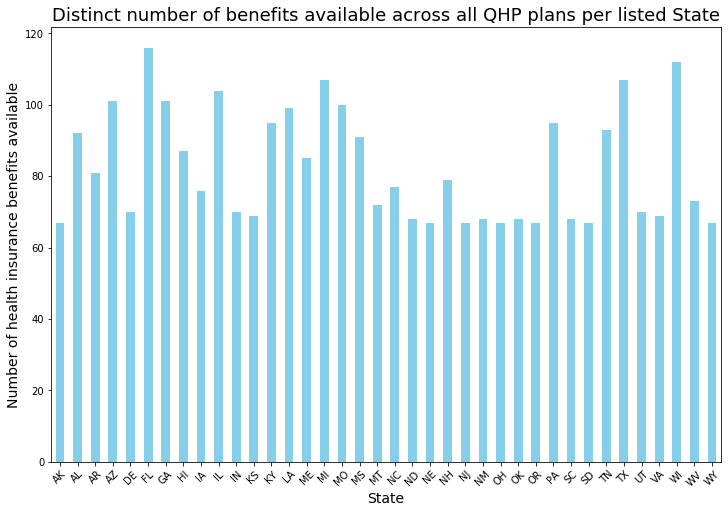

In [13]:
#Plot the distinct number of health insurance benefits offered by QHPs/issuers in listed states.

plt.figure(figsize = (12,8));
distinctbenefits_perstate.plot(kind = 'bar', rot = 45, color = 'skyblue');

plt.xlabel('State', fontsize = 14);
plt.ylabel('Number of health insurance benefits available', fontsize = 14);
plt.title('Distinct number of benefits available across all QHP plans per listed State', fontsize = 18);

### Rate PUF

In [14]:
#Read in the rate PUF dataset for 2020.

rate = pd.read_csv("D:/Datasets/CMS_healthinsurance_bundle_2020/Rate_PUF.csv");  #, encoding='cp1252');

In [15]:
#Manually set display options.

pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

In [16]:
#Display a few rows of rate DF and its shape.

display(rate.head())
display(rate.shape)

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080001,Rating Area 1,NaN,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41
1,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080001,Rating Area 2,NaN,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41
2,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080001,Rating Area 3,NaN,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41
3,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080002,Rating Area 1,NaN,Family Option,59.24,NaN,123.22,142.18,142.18,142.18,212.08,212.08,212.08
4,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080002,Rating Area 2,NaN,Family Option,59.24,NaN,123.22,142.18,142.18,142.18,212.08,212.08,212.08


(1886351, 21)

In [17]:
#Look at all column datatypes in rate DF.

display(rate.dtypes)

BusinessYear                                   int64
StateCode                                     object
IssuerId                                       int64
SourceName                                    object
ImportDate                                    object
FederalTIN                                    object
RateEffectiveDate                             object
RateExpirationDate                            object
PlanId                                        object
RatingAreaId                                  object
Tobacco                                       object
Age                                           object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        f

In [18]:
#Count of null values per column.

display(rate.isnull().sum())

BusinessYear                                       0
StateCode                                          0
IssuerId                                           0
SourceName                                         0
ImportDate                                         0
FederalTIN                                         0
RateEffectiveDate                                  0
RateExpirationDate                                 0
PlanId                                             0
RatingAreaId                                       0
Tobacco                                         1595
Age                                                0
IndividualRate                                     0
IndividualTobaccoRate                        1251860
Couple                                       1884756
PrimarySubscriberAndOneDependent             1884756
PrimarySubscriberAndTwoDependents            1884756
PrimarySubscriberAndThreeOrMoreDependents    1884756
CoupleAndOneDependent                        1

In [19]:
#Count of valid values per column.

display(rate.notnull().sum())

BusinessYear                                 1886351
StateCode                                    1886351
IssuerId                                     1886351
SourceName                                   1886351
ImportDate                                   1886351
FederalTIN                                   1886351
RateEffectiveDate                            1886351
RateExpirationDate                           1886351
PlanId                                       1886351
RatingAreaId                                 1886351
Tobacco                                      1884756
Age                                          1886351
IndividualRate                               1886351
IndividualTobaccoRate                         634491
Couple                                          1595
PrimarySubscriberAndOneDependent                1595
PrimarySubscriberAndTwoDependents               1595
PrimarySubscriberAndThreeOrMoreDependents       1595
CoupleAndOneDependent                         

In [20]:
#Print the number of unique states in rate DF.

print(rate.StateCode.nunique() ) #matches benefitscostsharing df

#print(benefitscostsharing.StateCode.nunique())   #to compare

38


In [21]:
#Look at value counts of Tobacco column (has usage indicators that determine rate eligibility for insurance plan)

display(rate.Tobacco.value_counts())

#Tobacco user: used any tobacco products four or more times a week in the past six months [3].
#Non-tobacco user: smoke cigars infrequently, such as one or less per month [4].


No Preference                    1250265
Tobacco User/Non-Tobacco User     634491
Name: Tobacco, dtype: int64

In [22]:
#Count of all valid responses to tobacco column (excludes NULLs).

validtobaccocount = rate.Tobacco.value_counts().values.sum();
print(validtobaccocount)

1884756


In [23]:
#Percentage of null tobacco values compared to all tobacco values.

nulltobaccocount = rate.Tobacco.isnull().sum();

#percentage of null responses in entire column
print(100 * (nulltobaccocount/ (nulltobaccocount + validtobaccocount)  ))

0.08455478328264464


In [24]:
#Check if all rows with NULL for Tobacco column can be dropped (since is small proportion of DF).

#View count of rows with NULL values for Tobacco column.
print(f'Count of rows with NULL in Tobacco column: {rate[rate["Tobacco"].isnull()].shape[0]}')

#View the unique Age values present in subset where Tobacco is NULL.
print(f'Unique Age values present in subset where Tobacco is NULL: {rate[rate["Tobacco"].isnull()].Age.unique()} ')

#Check the count of all rows with 'Family Option' as age in the full DF.
print(f'Count of rows with "Family Option" in Age column: {rate[rate["Age"] == "Family Option"].shape[0]}')

print(f'\nTherefore, the rows with NULL in Tobacco column cannot be dropped since they represent all rows with Age as "Family Option". ')


Count of rows with NULL in Tobacco column: 1595
Unique Age values present in subset where Tobacco is NULL: ['Family Option'] 
Count of rows with "Family Option" in Age column: 1595

Therefore, the rows with NULL in Tobacco column cannot be dropped since they represent all rows with Age as "Family Option". 


In [25]:
#Print all column names in rate DF.

display(rate.columns)

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'ImportDate',
       'FederalTIN', 'RateEffectiveDate', 'RateExpirationDate', 'PlanId',
       'RatingAreaId', 'Tobacco', 'Age', 'IndividualRate',
       'IndividualTobaccoRate', 'Couple', 'PrimarySubscriberAndOneDependent',
       'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents'],
      dtype='object')

In [26]:
#Print count of records for non-tobacco user and no preference plans.
#(NULL IndividualTobaccoRate and valid IndividualRate)

print(rate[rate['IndividualTobaccoRate'].isnull()].shape)

(1251860, 21)


In [27]:
#Find valid counts of IndividualTobaccoRate values when Tobacco response is "No Preference".

mask = (rate.Tobacco == "No Preference");
display(rate[mask].head())
display(rate[mask].IndividualTobaccoRate.value_counts())   #check counts for Tobacco-based rate (all should be NULLs)

print(f'\nAll values for IndividualTobaccoRate are NULL for this subset as expected (defined in data dict).')


,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
52,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-12-31,21989AK0030001,Rating Area 1,No Preference,0-14,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-12-31,21989AK0030001,Rating Area 1,No Preference,15,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-12-31,21989AK0030001,Rating Area 1,No Preference,16,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-12-31,21989AK0030001,Rating Area 1,No Preference,17,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-12-31,21989AK0030001,Rating Area 1,No Preference,18,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Series([], Name: IndividualTobaccoRate, dtype: int64)


All values for IndividualTobaccoRate are NULL for this subset as expected (defined in data dict).


In [28]:
#View all rows with Tobacco as "No Preference" and IndividualTobaccoRate as NULL.
m = ((rate.Tobacco == "No Preference") & (rate.IndividualTobaccoRate.isnull() ))  ;
print(rate[m].shape)

print(f'''\nAll rows with Tobacco as "No Preference" account for all NULL values in IndividualTobaccoRate,
so no cleaning needed for this column.''')

(1250265, 21)

All rows with Tobacco as "No Preference" account for all NULL values in IndividualTobaccoRate,
so no cleaning needed for this column.


In [29]:
#View rows with Tobacco as "Tobacco User/Non-Tobacco User", and IndividualTobaccoRate is higher than IndividualRate.
#If so -- then I am assuming these are the Tobacco users.

#Create mask for rows with Tobacco as "Tobacco User/Non-Tobacco User".
mask1 = (rate['Tobacco'] == "Tobacco User/Non-Tobacco User");
print(f'Value counts for rate subset with Tobacco as "Tobacco User/Non-Tobacco User":\n{mask1.value_counts()}\n')

#Create mask for rows with IndividualTobaccoRate greater than IndividualRate.
mask2 = (rate['IndividualTobaccoRate'] > rate['IndividualRate']);
print(f'Value counts for rate subset with IndividualTobaccoRate > IndividualRate:\n{mask2.value_counts()}')



Value counts for rate subset with Tobacco as "Tobacco User/Non-Tobacco User":
False    1251860
True      634491
Name: Tobacco, dtype: int64

Value counts for rate subset with IndividualTobaccoRate > IndividualRate:
False    1329932
True      556419
dtype: int64


## Section 2: Feature Engineering from Existing Data

### Create column "Is_tobacco_user" in rate DF.

In [30]:
#Create column "Is_tobacco_user" (T/F) based on both premiums.
#This can be used to differentiate between users and non-users for records with "Tobacco User/Non-Tobacco User".

is_tobacco_user = (mask1 & mask2);  #create new mask from both masks used in the last code block

rate['Is_tobacco_user'] = is_tobacco_user;   #create new column (boolean datatype) in rate DF


In [31]:
#View all columns in rate DF, which now includes the "Is_tobacco_user" column.

display(rate.columns)

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'ImportDate',
       'FederalTIN', 'RateEffectiveDate', 'RateExpirationDate', 'PlanId',
       'RatingAreaId', 'Tobacco', 'Age', 'IndividualRate',
       'IndividualTobaccoRate', 'Couple', 'PrimarySubscriberAndOneDependent',
       'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents',
       'Is_tobacco_user'],
      dtype='object')

In [32]:
#View the counts and datatype of the "Is_tobacco_user" column.

display(rate.Is_tobacco_user.value_counts())
display(rate.Is_tobacco_user.dtype)

False    1329932
True      556419
Name: Is_tobacco_user, dtype: int64

dtype('bool')

In [33]:
#Average IndividualRate across all insurance plans (for a particular effective period).

print(f'Average Individual Rate per term across all insurance plans: ${round(rate.IndividualRate.mean(),2)}')

Average Individual Rate per term across all insurance plans: $341.94


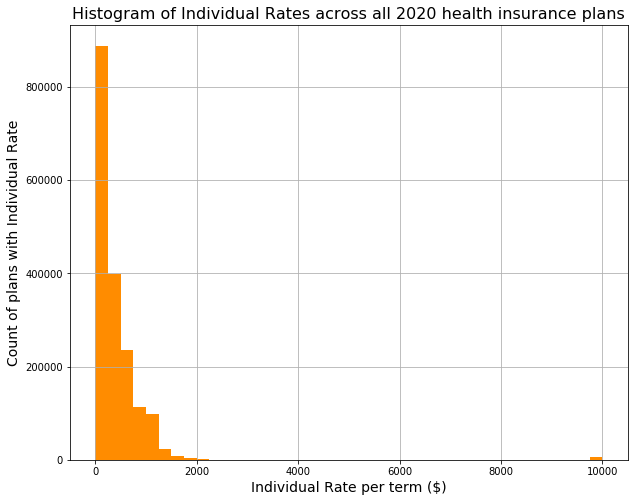

In [34]:
#Plot histogram of IndividualRate across all health insurance plans.
#(IndividualRate is used if Tobacco specified as "No preference" or to a non-tobacco user)

nbins = [*range(1,10250,250)];  #specify bin widths

rate.IndividualRate.hist(bins = nbins, figsize = (10,8), color = 'darkorange'); #histogram with custom bins
plt.xlabel('Individual Rate per term ($)', fontsize = 14);
plt.ylabel('Count of plans with Individual Rate', fontsize = 14);
plt.title('Histogram of Individual Rates across all 2020 health insurance plans', fontsize = 16);


### Create "IndividualRate_actual" column in Rate DF.

In [35]:
#Create IndividualRate_actual column, where value equals: 
#IndividualTobaccoRate if Is_tobacco_user is True.
#IndividualRate if Is_tobacco_user is False.

actual_rate = list()  #initialize list

for r in rate.index:  #iterate through DF indices
    if rate.iloc[r].Is_tobacco_user:  #if true
        actual_rate.append(rate.iloc[r].IndividualTobaccoRate)
    else:
        actual_rate.append(rate.iloc[r].IndividualRate)

    

In [36]:
#Add new "IndividualRate_actual" column to rate DF.

rate['IndividualRate_actual'] = actual_rate;

In [37]:
#View a few rows of updated rate DF.

display(rate.head())

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,Is_tobacco_user,IndividualRate_actual
0,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080001,Rating Area 1,NaN,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41,False,51.23
1,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080001,Rating Area 2,NaN,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41,False,51.23
2,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080001,Rating Area 3,NaN,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41,False,51.23
3,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080002,Rating Area 1,NaN,Family Option,59.24,NaN,123.22,142.18,142.18,142.18,212.08,212.08,212.08,False,59.24
4,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080002,Rating Area 2,NaN,Family Option,59.24,NaN,123.22,142.18,142.18,142.18,212.08,212.08,212.08,False,59.24


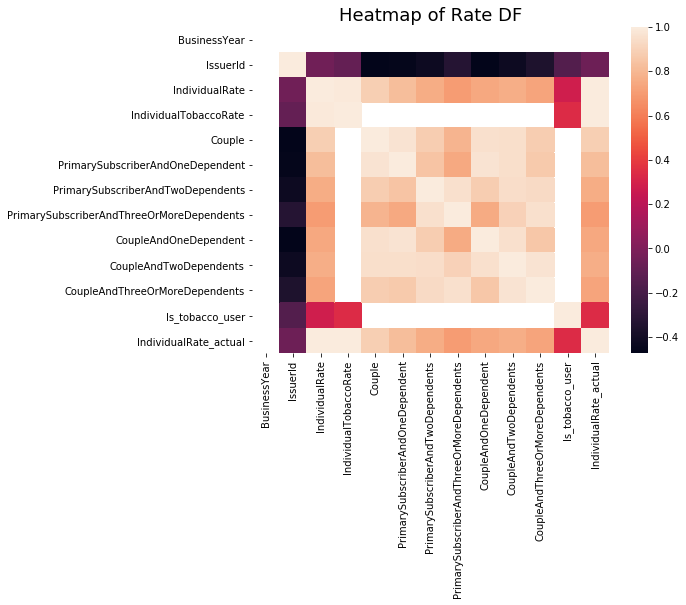

In [38]:
#Use heatmap to view correlated variables in Rate DF.

plt.figure(figsize = (8,6));
sns.heatmap(rate.corr());
plt.title('Heatmap of Rate DF', fontsize = 18);

#Positive correlation between Is_tobacco_user and (IndividualRate, IndividualTobaccoRate, IndividualRate_actual).

### Merge Benefits Cost Sharing and Rate DFs.

In [39]:
#View number of unique Issuer ids in rate DF.

#IssuerId is Five-digit numeric code that identifies the issuer organization in the Health Insurance Oversight System (HIOS).

print(rate.IssuerId.nunique())

430


In [40]:
#View first 10 unique benefit names in DF.

display(benefitscostsharing.BenefitName.sort_values().unique()[:10])

array(['"Periradicular Surgical Procedures\t"\t',
       'Abortion for Which Public Funding is Prohibited',
       'Accidental Dental', 'Accidental Dental - Child',
       'Accidental Dental Adult', 'Active & Fit', 'Acupuncture',
       'Adult Frames and Lenses', 'Adult Optical (hardware)',
       'Adult Vision Frames or Lenses'], dtype=object)

In [41]:
#Create new DF with only IssuerId and BenefitName columns (for join with rate DF), and view first few rows.

benefits_issueridandname = benefitscostsharing[['IssuerId','BenefitName']];
display(benefits_issueridandname.head())

,IssuerId,BenefitName
0,21989,Routine Dental Services (Adult)
1,21989,Dental Check-Up for Children
2,21989,Basic Dental Care - Child
3,21989,Orthodontia - Child
4,21989,Major Dental Care - Child


In [42]:
#Find number of unique benefits provided per each IssuerId in entire DF.

display(benefits_issueridandname.groupby('IssuerId').BenefitName.nunique())

IssuerId
10046     9
10091    67
10207    67
11083     9
11269    67
         ..
99708     9
99723    68
99734     9
99787     9
99969    67
Name: BenefitName, Length: 430, dtype: int64

In [43]:
#View shape for both benefits_issueridandname and rate DFs.

print(f'Benefits_issueridandname: {benefits_issueridandname.shape}')
print(f'Rate: {rate.shape}')

Benefits_issueridandname: (1182666, 2)
Rate: (1886351, 23)


In [44]:
#Find count of distinct IssuerIds per state.

display(rate.groupby('StateCode').IssuerId.nunique())

StateCode
AK     4
AL     9
AR     7
AZ    18
DE     4
      ..
UT    13
VA    18
WI    21
WV     5
WY     4
Name: IssuerId, Length: 38, dtype: int64

In [45]:
#Save all unique IssuerIds from each state (for use with prediction), and view IssuerIds from top few states.

uniqueissuersperstate = rate.groupby('StateCode').IssuerId.unique();   # list of distinct ids per state

display(uniqueissuersperstate.head())


StateCode
AK                         [21989, 38344, 74819, 77963]
AL    [12538, 18239, 18756, 28725, 44580, 46944, 600...
AR    [26904, 28348, 37903, 60559, 62141, 70525, 75293]
AZ    [12303, 13877, 17100, 17454, 24106, 30045, 338...
DE                         [26018, 60359, 67775, 76168]
Name: IssuerId, dtype: object

In [46]:
#Look at distinct benefits for distinct issuers.

#Group both issuers and benefit names (creates a multiindex) and save into Series.

distinct_issuersandbenefits = benefits_issueridandname.groupby(by = ['IssuerId','BenefitName']).count();


In [47]:
#View the multi-index in distinct_issuersandbenefits Series.

display(distinct_issuersandbenefits.index)

MultiIndex([(10046,                               'Accidental Dental'),
            (10046,                       'Basic Dental Care - Adult'),
            (10046,                       'Basic Dental Care - Child'),
            (10046,                    'Dental Check-Up for Children'),
            (10046,                       'Major Dental Care - Adult'),
            (10046,                       'Major Dental Care - Child'),
            (10046,                             'Orthodontia - Adult'),
            (10046,                             'Orthodontia - Child'),
            (10046,                 'Routine Dental Services (Adult)'),
            (10091, 'Abortion for Which Public Funding is Prohibited'),
            ...
            (99969,                                'Specialist Visit'),
            (99969,                                 'Specialty Drugs'),
            (99969,     'Substance Abuse Disorder Inpatient Services'),
            (99969,    'Substance Abuse Disorder

In [48]:
#Use reset_index() to turn multi indexes into columns (and adds new index column). The Series is now a DF.

distinct_issuersandbenefits.reset_index(inplace = True);  
display(distinct_issuersandbenefits.head());


,IssuerId,BenefitName
0,10046,Accidental Dental
1,10046,Basic Dental Care - Adult
2,10046,Basic Dental Care - Child
3,10046,Dental Check-Up for Children
4,10046,Major Dental Care - Adult


In [49]:
#View shape of distinct_issuersandbenefits DF.

print(distinct_issuersandbenefits.shape)

(14772, 2)


### Save Rate DF subset with relevant columns (issuer-level) to merge with distinct_issuersandbenefits DF.
Columns needed: "StateCode", "IndividualRate_mean" (average of "IndividualRate_actual" across all plans for Issuer)

In [50]:
#View shape and first few rows of rate DF.

print(rate.shape)
display(rate.head())

(1886351, 23)


,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,Is_tobacco_user,IndividualRate_actual
0,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080001,Rating Area 1,NaN,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41,False,51.23
1,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080001,Rating Area 2,NaN,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41,False,51.23
2,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080001,Rating Area 3,NaN,Family Option,51.23,NaN,106.56,122.95,122.95,122.95,183.41,183.41,183.41,False,51.23
3,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080002,Rating Area 1,NaN,Family Option,59.24,NaN,123.22,142.18,142.18,142.18,212.08,212.08,212.08,False,59.24
4,2020,AK,21989,HIOS,2019-08-09 03:20:19,93-0438772,2020-01-01,2020-03-31,21989AK0080002,Rating Area 2,NaN,Family Option,59.24,NaN,123.22,142.18,142.18,142.18,212.08,212.08,212.08,False,59.24


In [51]:
#Group rate DF on IssuerId and take mean of IndividualRate_actual (to create IndividualRate_mean column).

rate_groupedonissuer = rate.groupby('IssuerId').mean().round(2); #round to 2 decimal places

In [52]:
#Save new DF for only IssuerId and IndividualRate_mean.

rate_issuermean = rate_groupedonissuer[['IndividualRate_actual']];
rate_issuermean = rate_issuermean.rename(columns = {'IndividualRate_actual':'IndividualRate_mean'}); #rename columns

In [53]:
#View first few rows of rate_issuermean DF.

display(rate_issuermean.head())

,IndividualRate_mean
IssuerId,
10046,36.16
10091,383.93
10207,559.12
11083,941.56
11269,1111.19


In [54]:
#Save IssuerId and StateCode into rate_issuersandstates DF.

rate_issuersandstates = rate[['IssuerId','StateCode']];

In [55]:
#Group rate_issuersandstates DF on columns IssuerId and StateCode to get distinct count of issuers per state.

distinct_issuersandstates = rate_issuersandstates.groupby(by = ['IssuerId','StateCode']).count();

In [56]:
#Use reset_index() to turn multi indexes into columns (and adds new index column), and view first few rows.

distinct_issuersandstates.reset_index(inplace = True);  
display(distinct_issuersandstates.head())

,IssuerId,StateCode
0,10046,HI
1,10091,OR
2,10207,VA
3,11083,MI
4,11269,WY


In [57]:
#Confirm each IssuerId is only in one state.

print(f"Count of all issuers and their states grouped: {len(distinct_issuersandstates.groupby(by = ['IssuerId','StateCode']).count()) }" )

print(f'Count of all distinct issuers: {distinct_issuersandstates.IssuerId.nunique()}')

Count of all issuers and their states grouped: 430
Count of all distinct issuers: 430


In [58]:
#Merge distinct_issuersandbenefits and distinct_issuersandstate DFs on IssuerId.

distinct_issuers_states_benefits = pd.merge(distinct_issuersandstates,
                                                   distinct_issuersandbenefits, on = 'IssuerId');

In [59]:
#View shape of distinct_issuers_states_benefits DF.

print(distinct_issuers_states_benefits.shape)

(14772, 3)


### Add "IndividualRate_mean" column.

In [60]:
#Merge distinct_issuers_states_benefits and rate_issuermean DFs on IssuerId.

distinct_issuers_relevantinfo = pd.merge(distinct_issuers_states_benefits, 
                                                rate_issuermean, left_on = 'IssuerId', right_index = True);

In [61]:
#View shape and first few rows of distinct_issuers_relevantinfo DF.

print(distinct_issuers_relevantinfo.shape)
display(distinct_issuers_relevantinfo.head())

(14772, 4)


,IssuerId,StateCode,BenefitName,IndividualRate_mean
0,10046,HI,Accidental Dental,36.16
1,10046,HI,Basic Dental Care - Adult,36.16
2,10046,HI,Basic Dental Care - Child,36.16
3,10046,HI,Dental Check-Up for Children,36.16
4,10046,HI,Major Dental Care - Adult,36.16


### Create and add "num_relevant_benefits" column.

In [62]:
distinct_issuersandbenefits.head()

,IssuerId,BenefitName
0,10046,Accidental Dental
1,10046,Basic Dental Care - Adult
2,10046,Basic Dental Care - Child
3,10046,Dental Check-Up for Children
4,10046,Major Dental Care - Adult


In [63]:
#Save all unique IssuerIds (430) into a list.

all_issuers_list = distinct_issuersandbenefits.IssuerId.unique();

In [64]:
#Use distinct_issuersandbenefits DF and count number of relevant benefits per IssuerId.

#Relevant benefits were decided by manual inspection of all unique benefits in the DF.

rb_count_list = list(); #list to hold nested lists of [IssuerId, count of relevant benefits]

#My selected relevant benefits (9 total).
relevant_benefits = ['Routine Dental Services (Adult)' 
,'Imaging (CT/PET Scans, MRIs)' 
,'Anesthetics'
,'Cardiovascular Disease'
,'Contraceptive Services'
,'Emergency Room Services'
,'Primary Care E-Visit'
,'Infusion Therapy'
,'Transplant'
];  

#Iterate through distinct IssuerIds in all_issuers_list.

for idx, r in enumerate(all_issuers_list):
    #Initialize relevant benefit counter for each issuer
    counter = 0; 
    
    #Save unique benefits per issuer.
    listofbenefits_forissuer = distinct_issuersandbenefits[distinct_issuersandbenefits.IssuerId == r].BenefitName.unique(); 
    
    for b in listofbenefits_forissuer:  #iterate through benefits for current issuer
        if b in relevant_benefits:   #if benefit is relevant, add 1 to the counter.
            counter += 1 
    
    rb_count_list.append([r, counter]) #append sublist of [IssuerId, counter] to rb_count_list 
    

In [65]:
#Create rb_count_DF.
rb_count_DF = pd.DataFrame(rb_count_list);   #list of lists

#Rename columns.
rb_count_DF.columns = ['IssuerId','num_relevant_benefits']; #rename columns

#View top few rows.
display(rb_count_DF.head())

,IssuerId,num_relevant_benefits
0,10046,1
1,10091,5
2,10207,5
3,11083,1
4,11269,5


In [66]:
#Drop the BenefitName column from distinct_issuers_relevantinfo DF, and view first few rows of updated DF (has duplicates).

distinct_issuers_relevantinfo.drop('BenefitName', axis = 1, inplace = True);
display(distinct_issuers_relevantinfo.head())

,IssuerId,StateCode,IndividualRate_mean
0,10046,HI,36.16
1,10046,HI,36.16
2,10046,HI,36.16
3,10046,HI,36.16
4,10046,HI,36.16


In [67]:
#Create "QualityOfCare" column and add to rb_count_DF.

# Low: 1-3 relevant benefits provided by Issuer
# Medium: 4-6 relevant benefits provided by Issuer
# High: 7-9 relevant benefits provided by Issuer

#Write function to input a row from DF and output the QualityOfCare based on num_relevant_benefits. 

def predict_QOC(df):
    preds = [];
    for ind, row in df.iterrows():   #iterate through each row of the DF        
        if row.num_relevant_benefits < 4:
            prediction = 'Low';
        elif row.num_relevant_benefits < 7:
            prediction = 'Medium';
        else:
            prediction = 'High';
        preds.append(prediction);
    
    df['QualityOfCare'] = preds;   #save all predictions into new column 
    
predict_QOC(rb_count_DF)  #add column to DF 


In [68]:
#View first few rows of the updated rb_count_DF.

display(rb_count_DF.head())

,IssuerId,num_relevant_benefits,QualityOfCare
0,10046,1,Low
1,10091,5,Medium
2,10207,5,Medium
3,11083,1,Low
4,11269,5,Medium


In [69]:
#View value counts for "QualityOfCare" from rb_count_DF. 

print(rb_count_DF.QualityOfCare.value_counts())

Low       255
Medium    174
High        1
Name: QualityOfCare, dtype: int64


### Create and add dummy columns for each state.

In [70]:
#View top few rows of distinct_issuers_relevantinfo DF (has duplicates).

display(distinct_issuers_relevantinfo.head())

,IssuerId,StateCode,IndividualRate_mean
0,10046,HI,36.16
1,10046,HI,36.16
2,10046,HI,36.16
3,10046,HI,36.16
4,10046,HI,36.16


In [71]:
#Group distinct_issuers_random_relevantinfo by all columns to have one distinct IssuerId on each row (creates a multi-index).

distinct_issuers_relevantinfo = distinct_issuers_relevantinfo.groupby(by = ['IssuerId','StateCode','IndividualRate_mean']).count()

In [72]:
#View top few rows of distinct_issuers_relevantinfo DF (duplicates now removed).

display(distinct_issuers_relevantinfo.head())

,,
IssuerId,StateCode,IndividualRate_mean
10046,HI,36.16
10091,OR,383.93
10207,VA,559.12
11083,MI,941.56
11269,WY,1111.19


In [73]:
#Use reset_index() to turn multi-index into separate columns (and adds new index column).

distinct_issuers_relevantinfo.reset_index(inplace = True);  

In [74]:
#View top few rows of distinct_issuers_relevantinfo DF (has 3 new columns).

display(distinct_issuers_relevantinfo.head())

,IssuerId,StateCode,IndividualRate_mean
0,10046,HI,36.16
1,10091,OR,383.93
2,10207,VA,559.12
3,11083,MI,941.56
4,11269,WY,1111.19


In [75]:
#Merge distinct_issuers_random_relevantinfo and rb_count_DF.

distinct_issuers_relevantinfo = pd.merge(distinct_issuers_relevantinfo
                                                , rb_count_DF, left_on='IssuerId', right_on= 'IssuerId');

In [76]:
#View top few rows of distinct_issuers_relevantinfo DF.

display(distinct_issuers_relevantinfo.head())

,IssuerId,StateCode,IndividualRate_mean,num_relevant_benefits,QualityOfCare
0,10046,HI,36.16,1,Low
1,10091,OR,383.93,5,Medium
2,10207,VA,559.12,5,Medium
3,11083,MI,941.56,1,Low
4,11269,WY,1111.19,5,Medium


In [77]:
#Create state dummy columns from distinct_issuers_relevantinfo DF. There is one indicator column for each state.

state_dummies = pd.get_dummies(distinct_issuers_relevantinfo.StateCode); #create dummy columns (integer type)
distinct_issuers_relevantinfo.drop('StateCode', axis = 1, inplace = True); #drop existing StateCode column since categorical

In [78]:
#Join state dummies to DF.

distinct_issuers_relevantinfo = distinct_issuers_relevantinfo.join(state_dummies);


In [79]:
#View shape and first few rows of distinct_issuers_relevantinfo DF.

print(distinct_issuers_relevantinfo.shape)
display(distinct_issuers_relevantinfo.head())

(430, 42)


,IssuerId,IndividualRate_mean,num_relevant_benefits,QualityOfCare,AK,AL,AR,AZ,DE,FL,GA,HI,IA,IL,IN,...,NJ,NM,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,WI,WV,WY
0,10046,36.16,1,Low,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10091,383.93,5,Medium,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,10207,559.12,5,Medium,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,11083,941.56,1,Low,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11269,1111.19,5,Medium,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


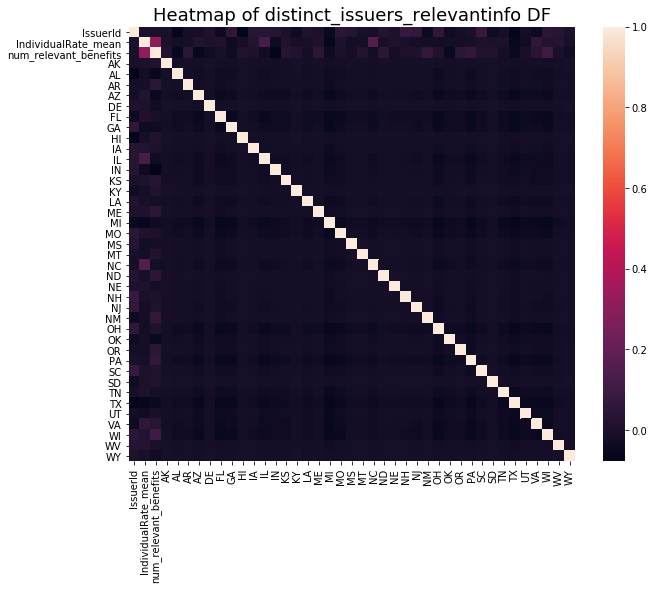

In [80]:
#View heatmap of distinct_issuers_relevantinfo DF to determine which features to use.

plt.figure(figsize = (10,8));
sns.heatmap(distinct_issuers_relevantinfo.corr());
plt.title('Heatmap of distinct_issuers_relevantinfo DF', fontsize = 18);

### Pair-Wise Correlations in Heatmap:

IndividualRate_mean has a positive correlation with QualityOfCare_num. 
IndividualRate_mean has a positive correlation with num_relevant benefits.
QualityOfCare_num has a strong positive correlation with num_relevant_benefits (because they are directly related).
The state dummy columns each have little to no correlation at all with QualityOfCare_num.

Therefore I choose to use IndividualRate_mean and the 38 state dummy columns as my features for prediction.
Although the state dummy columns each have little to no correlation to QualityOfCare_num, the minimal weighting of each column could improve the accuracy of the models due to the small sample size of issuers in the dataset (although this introduces increased model complexity). Also, I cannot use the num_relevant_benefits column because it is used to create the QualityOfCare column (from which the QualityOfCare_num column is derived from).

## Section 3: Predictive KNN Classifier Models and Analysis 
### Predicting Quality Of Care of an Issuer using KNN Classification.

In [81]:
#Import relevant modules for prediction/classification.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold

In [82]:
#Map QualityOfCare values to numbers (create/map new column based on existing column), and add new column to DF.

distinct_issuers_relevantinfo['QualityOfCare_num'] = distinct_issuers_relevantinfo.QualityOfCare.map({'Low':0
                                                                                                     , 'Medium':1, 'High':2});

In [83]:
#View top few rows of DF (now has QualityOfCare_num column).

display(distinct_issuers_relevantinfo.head())

,IssuerId,IndividualRate_mean,num_relevant_benefits,QualityOfCare,AK,AL,AR,AZ,DE,FL,GA,HI,IA,IL,IN,...,NM,OH,OK,OR,PA,SC,SD,TN,TX,UT,VA,WI,WV,WY,QualityOfCare_num
0,10046,36.16,1,Low,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10091,383.93,5,Medium,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,10207,559.12,5,Medium,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,11083,941.56,1,Low,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11269,1111.19,5,Medium,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [84]:
#Create feature matrix (X) from columns in distinct_issuers_relevantinfo DF.
#Use IndividualRate_mean and the 38 state columns as 39 total features.

features = ['IndividualRate_mean','AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', 'HI', 'IA', 'IL', 'IN', 'KS',
       'KY', 'LA', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WI',
       'WV', 'WY'];

X = distinct_issuers_relevantinfo[features];

In [85]:
#View shape and number of features in X.

print(f'Shape of X matrix: {X.shape}')
print(f'Number of features: {len(features)}')

Shape of X matrix: (430, 39)
Number of features: 39


In [86]:
#Create response vector (y) for target value QualityOfCare_num.

y = distinct_issuers_relevantinfo['QualityOfCare_num']; 

In [87]:
#View length of y vector.

print(f'Length of y vector: {len(y)}')

Length of y vector: 430


### Create, train, and test a KNN Classifier model for k = 1.

In [88]:
#Split X and y into training and testing sets, and use random seed for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42) #use 70% of data for train set

In [89]:
#View shapes of train and test sets.

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (301, 39), y_train shape: (301,)
X_test shape: (129, 39), y_test shape: (129,)


In [90]:
#Train model with train set using k = 1 (number of neighbors).

k = 1; #number of neighbors
knn = KNeighborsClassifier(n_neighbors = k);
knn.fit(X_train, y_train); #fit the model

In [91]:
#Use KNN model to predict QualityOfCare_num values for Test set and check Testing accuracy.

y_pred = knn.predict(X_test);  #predict based on test split
testacc = metrics.accuracy_score(y_test, y_pred); #testing accuracy
print(f'Testing accuracy for k={k}: {testacc}')

Testing accuracy for k=1: 0.9844961240310077


### Determine Null accuracy (baseline) to compare to Testing accuracy.
Null accuracy is the accuracy that can be achieved by always predicting the most frequent class.

In [92]:
#Determine the most frequent class in the target vector (y).
#Mapped values: Low is 0, Medium is 1, High is 2.

most_freq_class = y_train.value_counts().index[0];

print(y_train.value_counts())  #value counts from train set
print(f'\nMost frequent class: {most_freq_class}')

#180 issuers have 'Low' quality of care.
#120 issuers have 'Medium' quality of care.
#1 issuer has 'High' quality of care.

0    180
1    120
2      1
Name: QualityOfCare_num, dtype: int64

Most frequent class: 0


In [93]:
#Compute the Null accuracy of the testing set.

nullacc = ( y_test.value_counts()[most_freq_class] / len(y_test)  );
print(f'Null accuracy: {nullacc}')


Null accuracy: 0.5813953488372093


In [94]:
print(f'The KNN model with k={k} has Testing accuracy = {testacc} and Null accuracy = {nullacc}.')
print(f'Therefore the KNN-{k} model has an accuracy improvement of {round(100*(testacc - nullacc),3)}% over the baseline model.')

The KNN model with k=1 has Testing accuracy = 0.9844961240310077 and Null accuracy = 0.5813953488372093.
Therefore the KNN-1 model has an accuracy improvement of 40.31% over the baseline model.


### Find optimal K number of neighbors for best KNN Classifier model accuracy.

In [95]:
#View accuracy of training set for models trained upon k's 1 to 50.

scores = []; #initialize list to save sublists of [k, score]

#Iterates through k's 1 to 50
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k);
    knn.fit(X_train,y_train);
    pred = knn.predict(X_train);
    score = float(sum(pred == y_train)) / len(y_train);   #pred and y_train need to be same length
    scores.append([k, score]);


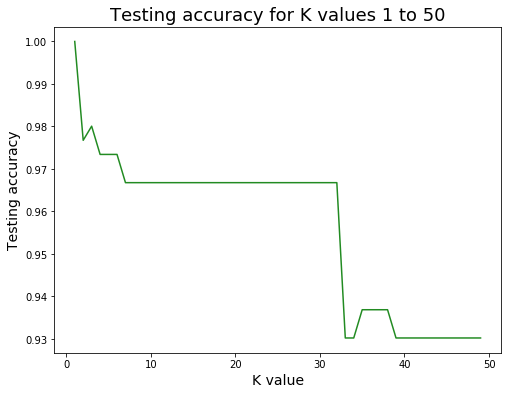

In [96]:
#Line plot of k's from 1 to 50.

k_score_DF = pd.DataFrame(scores,columns=['k','score']);  #create DF from scores list
k_score_DF.plot(kind = 'line', x='k', y='score', c = 'forestgreen', figsize = (8,6), legend = False);
plt.title("Testing accuracy for K values 1 to 50", fontsize = 18);
plt.xlabel('K value', fontsize = 14);
plt.ylabel('Testing accuracy', fontsize = 14);

In [97]:
#Find the best k value (optimal).

#Calculate training and testing error for k's 1 to 50.

k_range = list(range(1, 51));
training_error = [];
testing_error = [];

#Find test accuracy for all values of k between 1 and 50 (inclusive).
for k in k_range:

    #Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors = k);
    knn.fit(X_train, y_train);
    
    #Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train);
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class);
    training_error.append(1 - training_accuracy); #error and accuracy are inverse
    
    #Calculate testing error.
    y_pred_class = knn.predict(X_test);
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class);
    testing_error.append(1 - testing_accuracy); #error and accuracy are inverse


In [98]:
#Create a DataFrame of k, training error, and testing error.

k_errors_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error};
k_errors_df = pd.DataFrame(k_errors_dict).set_index('K').sort_index(ascending=True); #set index to k and sort values 
display(k_errors_df.head(5))

,training error,testing error
K,,
1,0.000000,0.015504
2,0.023256,0.023256
3,0.019934,0.023256
4,0.026578,0.031008
5,0.026578,0.031008


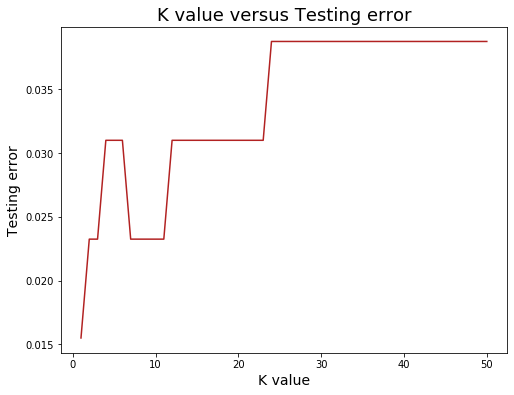

In [99]:
#Plot the relationship between k and testing error (lower is better).

k_errors_df.plot(y='testing error', figsize = (8,6), c = 'firebrick', legend = False); #hide legend
plt.xlabel('K value', fontsize = 14);
plt.ylabel('Testing error', fontsize = 14);
plt.title('K value versus Testing error', fontsize = 18);

In [100]:
#Find the minimum testing error and the associated K value.

#View top 10 rows of k_errors_df sorted by testing error.

k_errors_sorted = k_errors_df.sort_values('testing error');
display(k_errors_sorted.head(10))

,training error,testing error
K,,
1,0.000000,0.015504
2,0.023256,0.023256
3,0.019934,0.023256
7,0.033223,0.023256
8,0.033223,0.023256
9,0.033223,0.023256
10,0.033223,0.023256
11,0.033223,0.023256
23,0.033223,0.031008


The KNN model with k = 1 has optimal model complexity because it has the lowest testing error of 0.0155.


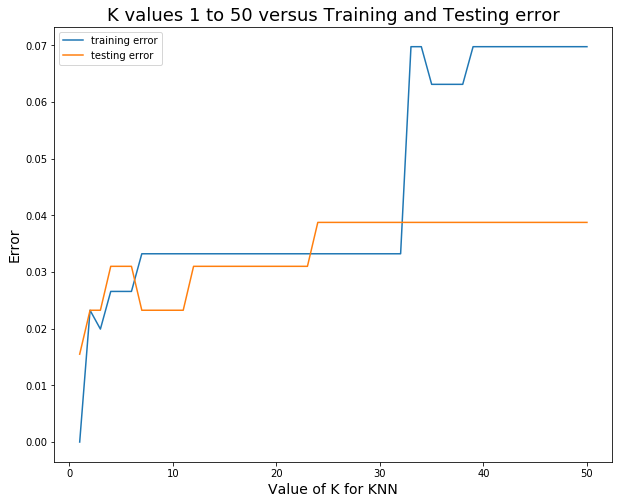

In [101]:
#Plot the relationship between k and both training and testing error.

k_errors_df.plot(figsize = (10,8));
plt.xlabel('Value of K for KNN', fontsize = 14);
plt.ylabel('Error', fontsize = 14);
plt.title('K values 1 to 50 versus Training and Testing error', fontsize = 18);

#Print out the model with optimal complexity (lowest testing error).

print(f'The KNN model with k = {k_errors_sorted.index[0]} has optimal model complexity because it has the lowest testing error of {round(k_errors_sorted.values[0][1],5)}.')

### Optimal K Analysis:

Although k = 1 appears to the most optimal value because of training error = 0 and testing error = 0.0155, these amazing results are a symptom of overtraining. A KNN model with k=1 estimates the probability of a value based on the closest sample (which would be itself in the case no other samples match). In reality, this model would be very sensitive to outliers and noise with a larger out-of-sample dataset.

It is better to use a higher k value to have a more robust model that is not as sensitive to outliers and noisy data, but not too high as to introduce more testing error. Therefore the optimal value is actually k = 11, which has training error = 0.03322 and testing error = 0.02326. Both of these error values remain the same from k's 7 through 11, but testing error increases at k = 12, so it is best to choose k = 11 actually.

### 5-Fold Cross Validation of optimal KNN model (k = 11).

In [102]:
#Create KFold cross-validator object with desired number of folds.

kf = KFold(n_splits=5, shuffle = True, random_state = 42);  #shuffle the data and use random seed for reproducibility
kf.get_n_splits(X); #returns number of splitting iterations in the cross-validator
print(kf)  #look at kf parameters

KFold(n_splits=5, random_state=42, shuffle=True)


In [103]:
#Iterate through each K-fold and train/test separate KNN models using the optimal k-nearest neighbors (determined above).

scores = []; #initialize list to hold accuracy scores for all folds

for train_index, test_index in kf.split(X):
    
    #Create train and test sets using the split indices.
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]; 
    y_train, y_test = y[train_index], y[test_index];
    
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    #Train model with train set using k = 11 (optimal number of neighbors).
    knn = KNeighborsClassifier(n_neighbors = 11);
    knn.fit(X_train, y_train);
    
    #Use KNN model to predict values for test set and check Testing accuracy.
    y_pred = knn.predict(X_test);  #predict Quality of care based on test set
    acc = metrics.accuracy_score(y_test, y_pred); #calculate accuracy score of current fold
    scores.append(round(acc,5)); #append rounded score to the scores list
    

(344, 39) (344,) (86, 39) (86,)
(344, 39) (344,) (86, 39) (86,)
(344, 39) (344,) (86, 39) (86,)
(344, 39) (344,) (86, 39) (86,)
(344, 39) (344,) (86, 39) (86,)


In [104]:
#View accuracy of each individual fold and the overall testing accuracy.

print(f'Testing accuracy of each fold: {scores}')
overalltestingacc = round(np.mean(scores),3);
print(f'Overall testing accuracy: {overalltestingacc}')

Testing accuracy of each fold: [0.97674, 0.96512, 0.97674, 0.95349, 0.95349]
Overall testing accuracy: 0.965


In [105]:
#View the standard deviation of the individual fold scores.

print(f'Standard Deviation of the individual fold scores: {round(np.std(scores),3)}')

Standard Deviation of the individual fold scores: 0.01


### Determine Null accuracy (baseline) of optimal model to compare to Overall (mean) testing accuracy.
Null accuracy is the accuracy that can be achieved by always predicting the most frequent class.

In [106]:
#Determine the most frequent class in the target vector (y).
#Mapped values: Low is 0, Medium is 1, High is 2.

most_freq_class = y_train.value_counts().index[0]; #last fold from cross-validation

print(y_train.value_counts())  #value counts from train set
print(f'\nMost frequent class: {most_freq_class}')

#198 issuers have 'Low' quality of care.
#145 issuers have 'Medium' quality of care.
#1 issuer has 'High' quality of care.

0    198
1    145
2      1
Name: QualityOfCare_num, dtype: int64

Most frequent class: 0


In [107]:
#Compute the Null accuracy of the testing set.

nullacc = (y_test.value_counts()[most_freq_class] / len(y_test)  );
print(f'Null accuracy: {nullacc}')


Null accuracy: 0.6627906976744186


In [108]:
#View the improvement of the overall (mean) testing accuracy of the optimal model compared to the baseline model.

percentimprovement = round( ((overalltestingacc - nullacc)/nullacc)*100 ,3);
print(f'The optimal KNN-11 model has an overall testing accuracy of {overalltestingacc}, which is an improvement of {percentimprovement}% over the baseline.')

The optimal KNN-11 model has an overall testing accuracy of 0.965, which is an improvement of 45.596% over the baseline.


### Predictive Modeling Analysis:

This working model to predict the quality of care of a US Health Insurance Provider (issuer) would allow customers (individuals and small businesses) to view how good their current insurance is based on the types of benefits that they currently receive, as well as view how their current individual premium rate stacks up against issuers in other states. In this way, existing customers can determine if they should find another Health Insurance Provider with better quality of care, and new customers can determine which states have the best quality of care for their price range. Other stakeholders include the issuers (e.g. Meridian Choice, Blue Cross), which can compare the quality of care they offer to customers against competitors in the same state or across the country, and perhaps offer better premium rates/more benefits in the future.

The 'QualityOfCare' engineered column is based on the number of relevant benefits offered by a unique issuer (430 total issuers). The relevant benefits (9 total) were selected based on my personal opinion regarding which benefits would be most valued by a typical customer seeking a good Health Insurance Provider. The issuer receives a value of "Low" if it provides 1-3 relevant benefits, "Medium" if it provides 4-6 relevant benefits, or "High" if it provides 7-9 relevant benefits. The 'QualityOfCare_num' column is the target variable that contains the values of (0,1,2) which map to values ('Low', 'Medium', 'High') from the 'QualityOfCare' column.

I decided to use 39 total features (independent variables) to train the KNN Classifier models: 'IndividualRate_mean' and 38 state dummy columns (one for each state provided in the dataset). The state dummy columns have boolean functionality, where 1 means the issuer is located in that state, and 0 means the issuer is not located there. 'IndividualRate_mean' is the most logical choice to use because it has a positive correlation to 'QualityOfCare_num' (target variable) according to the heatmap of distinct_issuers_relevantinfo DF. All the state dummy columns have little to no positive correlation to 'QualityOfCare_num', however I decided to use them all because the number of issuers available per state in the dataset is not consistent. For future work, I will look to reduce model complexity by narrowing down the amount of state columns used as features.

The optimal KNN Classifier model uses k = 11 because it has the next lowest testing error after k = 1, and is the highest k value out of k's with the same testing error (which I reviewed earlier in the Optimal K Analysis section). Using k = 11 leads to a more robust model than using k = 1 because it can handle outliers much better in practical application with out-of-sample data. Finally, I evaluated the optimal model using 5-Fold Cross Validation. For this the data is shuffled and partitioned into 5 unique batches, in which 4 batches are using as training data and 1 batch is used as testing data for each KNN-11 model.
The KNN-11 Classifier has an overall (mean) testing accuracy of 0.965, which is an improvement of 45% over the baseline model (for which all predictions are the most frequent value of 'QualityOfCare_num' in the testing set). 

**Conclusion: This KNN-11 Classifier model is useable for predicting the Quality of Care of a Health Insurance Provider.**

## Section 4: References

1) "Health Insurance Exchange Public Use Files (Exchange PUFs)", Accessed from https://www.cms.gov/cciio/resources/data-resources/marketplace-puf.

2) "Explore health and dental plans data in the US Health Insurance Marketplace", Accessed from https://www.kaggle.com/hhs/health-insurance-marketplace.

3) "Tobacco Users & Health Insurance Premiums", Accessed from https://www.americanexchange.com/tobacco-users-health-insurance-premiums/.

4) "What Smokers Should Know About Buying Life Insurance", Accessed from #https://www.forbes.com/advisor/life-insurance/smokers/.

